<a href="https://colab.research.google.com/github/AcerPing/AceTibaMe/blob/master/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train,y_train),(x_test,y_test) = load_data()
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [50]:
trans = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

automobile


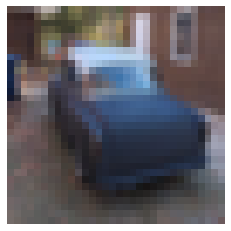

In [51]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
i = random.randint(0,50000-1)
print(trans[y_train[i][0]])
plt.axis("off")
plt.imshow(x_train[i])

In [52]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,GlobalAveragePooling2D
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.models import Sequential
layers = [#3*3*3(一個過濾器)*64(個)+64(bias)=1792
      Conv2D(64,3,padding="same",activation="relu",input_shape=(32, 32, 3)),
      MaxPooling2D(),
      #3*3*64(一個過濾器)*128(個)+128(bias)=73856
      Conv2D(128,3,padding="same",activation="relu"),
      MaxPooling2D(),
      Conv2D(256,3,padding="same",activation="relu"),
      MaxPooling2D(),
      Flatten(),
      Dense(256,activation="relu"),
      Dropout(0.25),
      Dense(10,activation="softmax")]
model = Sequential(layers)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)             

In [53]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),optimizer="adam",metrics=["accuracy"])


In [54]:
#卷積不需要攤開，直接進去
x_train_norm = x_train/255
x_test_norm = x_test/255


In [55]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
callbacks = [ModelCheckpoint("cnn.h5",save_best_only=True),
       EarlyStopping(patience=5,restore_best_weights=True)]
model.fit(x_train_norm,
     y_train,
     batch_size=200,
     validation_split=0.1,
     epochs=50,
     verbose=2,
     callbacks=callbacks)

Epoch 1/10
225/225 - 7s - loss: 1.6170 - accuracy: 0.4101 - val_loss: 1.2371 - val_accuracy: 0.5470
Epoch 2/10
225/225 - 7s - loss: 1.1712 - accuracy: 0.5845 - val_loss: 0.9780 - val_accuracy: 0.6554
Epoch 3/10
225/225 - 7s - loss: 0.9721 - accuracy: 0.6575 - val_loss: 0.8631 - val_accuracy: 0.7008
Epoch 4/10
225/225 - 7s - loss: 0.8395 - accuracy: 0.7090 - val_loss: 0.8259 - val_accuracy: 0.7142
Epoch 5/10
225/225 - 7s - loss: 0.7458 - accuracy: 0.7410 - val_loss: 0.7582 - val_accuracy: 0.7392
Epoch 6/10
225/225 - 7s - loss: 0.6664 - accuracy: 0.7681 - val_loss: 0.7307 - val_accuracy: 0.7514
Epoch 7/10
225/225 - 7s - loss: 0.5918 - accuracy: 0.7938 - val_loss: 0.6874 - val_accuracy: 0.7668
Epoch 8/10
225/225 - 7s - loss: 0.5178 - accuracy: 0.8194 - val_loss: 0.6813 - val_accuracy: 0.7672
Epoch 9/10
225/225 - 7s - loss: 0.4530 - accuracy: 0.8433 - val_loss: 0.6665 - val_accuracy: 0.7750
Epoch 10/10
225/225 - 7s - loss: 0.3924 - accuracy: 0.8622 - val_loss: 0.7179 - val_accuracy: 0.7650

In [56]:
model.evaluate(x_test_norm,y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.7571 - accuracy: 0.7537


[0.7570948600769043, 0.7537000179290771]

In [57]:
pre = model.predict_classes(x_test_norm)
pre

array([3, 8, 8, ..., 5, 1, 7])

In [58]:
print(pre.shape)
print(y_test.shape)
y_test_reshape = y_test.reshape(-1)
print(y_test_reshape.shape)

(10000,)
(10000, 1)
(10000,)


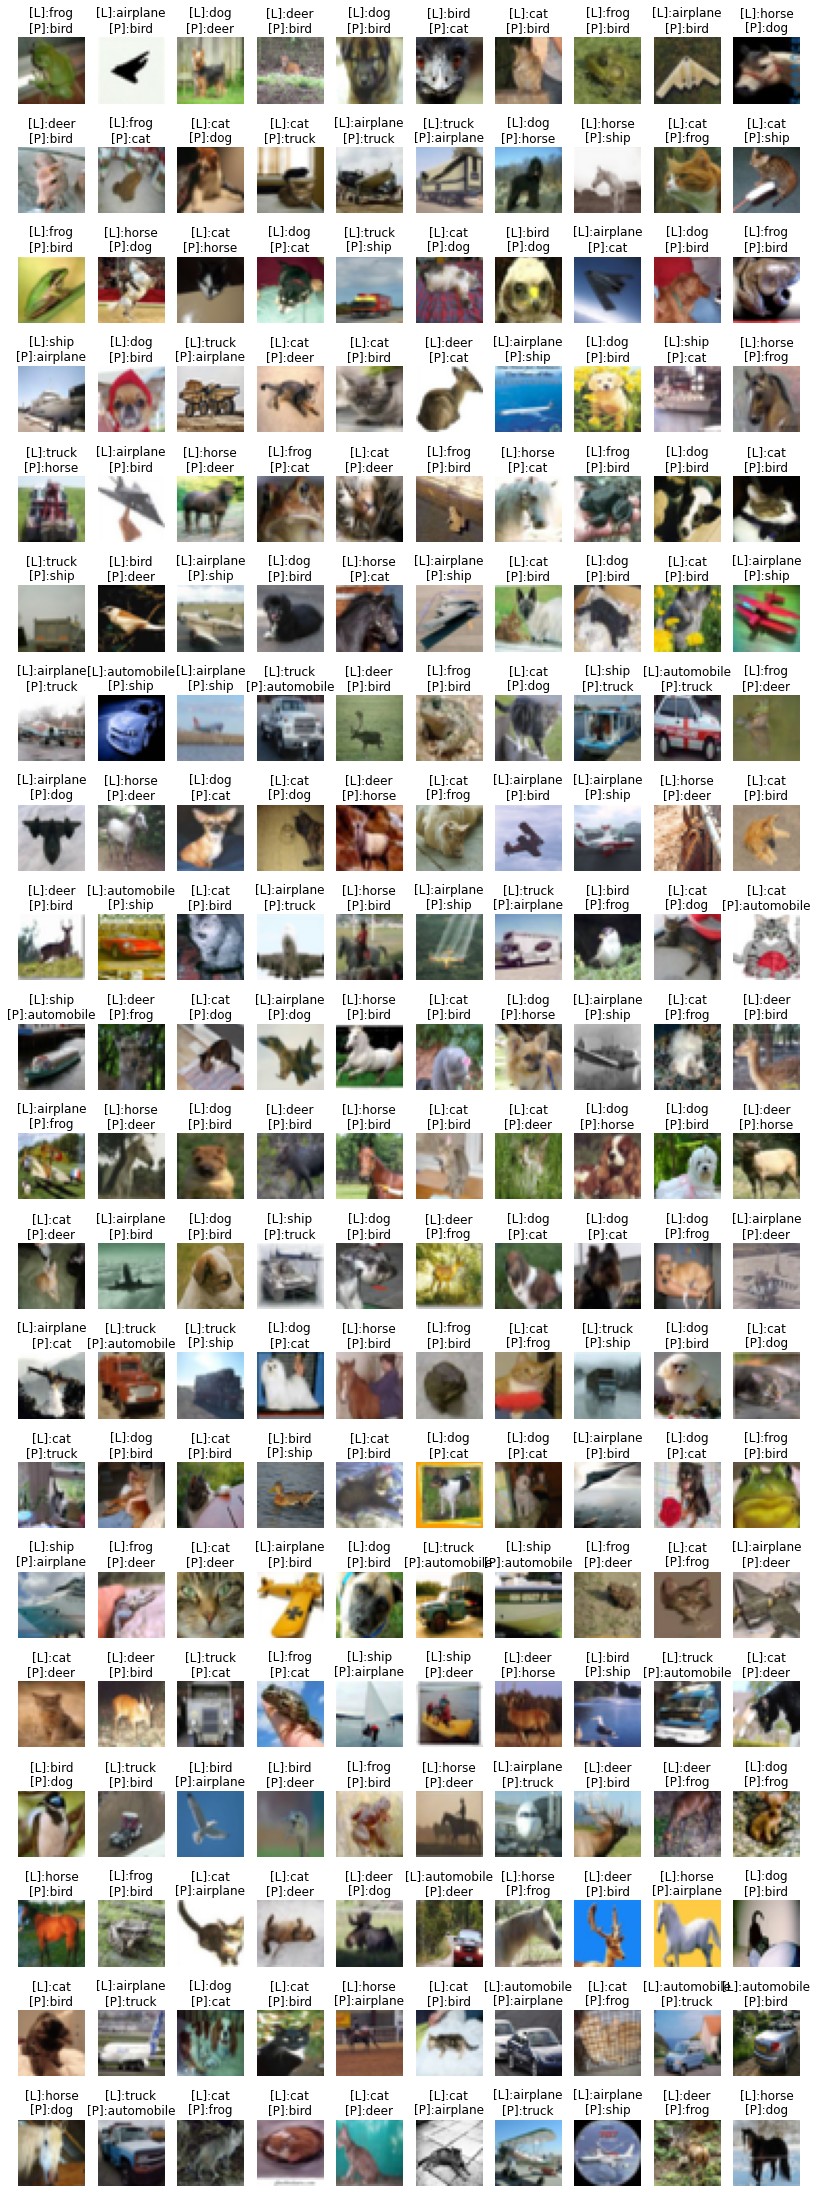

In [59]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(14,42))
idx = np.nonzero(pre != y_test_reshape)[0]
idx = idx[:200]
# false_img = x_test[idx]
# false_label = y_test[idx]
# false_pre = pre[idx]
width = 10
height = len(idx)//width+1
for i,d in enumerate(idx):
  img,label,p = x_test[d],y_test_reshape[d],pre[d]
  t = "[L]:{}\n[P]:{}".format(trans[label],trans[p])
  plt.subplot(height,width,i+1)
  plt.title(t)
  plt.axis("off")
  plt.imshow(img)

輸入網址:https://storage.googleapis.com/www-cw-com-tw/article/201810/article-5bd182cf13ebb.jpg


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


airplane 的機率: 0.0
automobile 的機率: 0.0
bird 的機率: 0.12
cat 的機率: 0.6
deer 的機率: 0.0
dog 的機率: 0.28
frog 的機率: 0.0
horse 的機率: 0.0
ship 的機率: 0.0
truck 的機率: 0.0


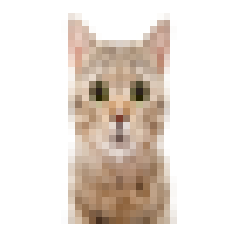

In [61]:
import requests
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img

url = input("輸入網址:")
#純文字:stream不加；檔案:stream=True
#verify = False防火牆調低
response = requests.get(url,stream=True,verify=False)
img = Image.open(response.raw).resize((32,32))
img = np.array(img)
img_np = np.array(img).reshape(1,32,32,3) / 255
pre = model.predict(img_np)[0]
pre.shape
for i in range(10):
  print(trans[i],"的機率:",round(pre[i],2))
plt.axis("off")
plt.imshow(np.array(img),cmap="Reds")
